# MLG Assingment 2

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)


# Importing Data

In [2]:
with open("poland-bankruptcy-data-2009.json", "r") as read_file:
    data = json.load(read_file)


# Data preperation

In [3]:
dataframe = pd.DataFrame().from_dict(data['data'])
dataframe.head()

,company_id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
0,1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
1,2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
2,3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
3,5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
4,6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [4]:
dataframe.describe()

,company_id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
count,9977.000000,9977.000000,9977.000000,9977.000000,9960.000000,9.952000e+03,9977.000000,9977.000000,9964.000000,9974.000000,...,9.977000e+03,9935.000000,9977.000000,9948.000000,9977.000000,9.415000e+03,9961.00000,9.935000e+03,9960.000000,9765.000000
mean,5252.399419,0.052688,0.623634,0.088614,10.067323,-1.412557e+03,-0.124340,0.065407,16.757657,1.820532,...,6.771696e+03,-0.561651,-0.028476,3.976806,1.486227,5.938426e+02,13.62412,1.364510e+02,9.034435,36.291450
std,3030.164482,0.662816,6.590734,6.584543,537.128699,1.216712e+05,7.145680,0.666113,673.845491,7.771473,...,6.121491e+04,57.438557,19.134737,195.155108,79.262784,3.812344e+04,73.22837,2.666901e+04,31.773572,438.506192
min,1.000000,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.59030,-2.336500e+06,-0.000156,-0.000102
25%,2636.000000,0.000700,0.255280,0.016341,1.036150,-5.266650e+01,0.000000,0.002265,0.430778,1.011100,...,1.304300e+01,0.005136,0.007051,0.875850,0.000000,5.532000e+00,4.49120,4.101200e+01,3.049300,2.003100
50%,5259.000000,0.042731,0.465920,0.197570,1.600650,1.495950e+00,0.000000,0.050661,1.104150,1.197300,...,8.874800e+02,0.051546,0.106550,0.953130,0.003356,9.933700e+00,6.67050,7.093200e+01,5.116700,4.031400
75%,7875.000000,0.123140,0.690060,0.415680,2.950525,5.601725e+01,0.071759,0.141700,2.827425,2.044550,...,4.363300e+03,0.129640,0.271860,0.995923,0.249600,2.077800e+01,10.58400,1.187050e+02,8.846400,9.574000
max,10503.000000,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4246.70000,1.073500e+06,1974.500000,21499.000000


In [5]:
dataframe.isnull().sum()

company_id      0
feat_1          0
feat_2          0
feat_3          0
feat_4         17
             ... 
feat_61        16
feat_62        42
feat_63        17
feat_64       212
bankrupt        0
Length: 66, dtype: int64

Dropping Company_id

In [6]:
dataframe.drop(columns=["company_id"],inplace=True)


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   floa

In [8]:
dataframe = dataframe.fillna(dataframe.mean())
dataframe.isnull().sum()

feat_1      0
feat_2      0
feat_3      0
feat_4      0
feat_5      0
           ..
feat_61     0
feat_62     0
feat_63     0
feat_64     0
bankrupt    0
Length: 65, dtype: int64

Splitting  the data

In [9]:
X = dataframe.iloc[:, :-1]
Y = dataframe.iloc[:, -1]
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split( X,Y,
    test_size=0.2, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (7981, 64)
y_train shape: (7981,)
X_test shape: (1996, 64)
y_test shape: (1996,)


Imputing data

In [10]:

X_train.replace('?',np.NaN,inplace=True )
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
idf=pd.DataFrame(imp.fit_transform(X_train))
idf.columns=X_train.columns
idf.index=X_train.index

In [11]:
print(X_train.isnull().sum())

feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
          ..
feat_60    0
feat_61    0
feat_62    0
feat_63    0
feat_64    0
Length: 64, dtype: int64


# Resampling 

Viewing imbalance of data first 

<Axes: >

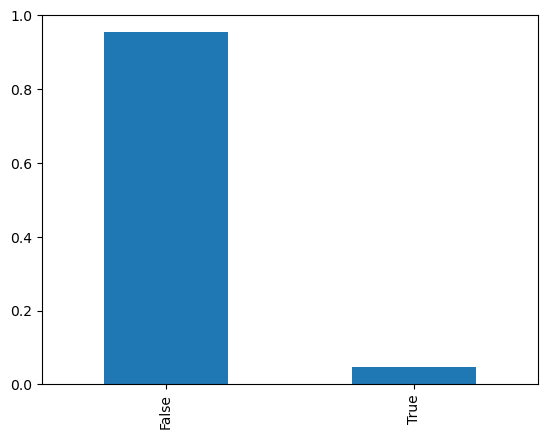

In [12]:
dataframe.bankrupt.value_counts(normalize=True).plot(kind='bar')

Resampling the data so there is more variance to make disicions by using the Random Over-Sampling method 

In [13]:
over_sampler = RandomOverSampler(random_state = 42)

X_train_over,y_train_over=over_sampler.fit_resample(X_train,Y_train)
print(X_train_over.isnull().sum())

feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
          ..
feat_60    0
feat_61    0
feat_62    0
feat_63    0
feat_64    0
Length: 64, dtype: int64


Plotting data distribution

<Axes: >

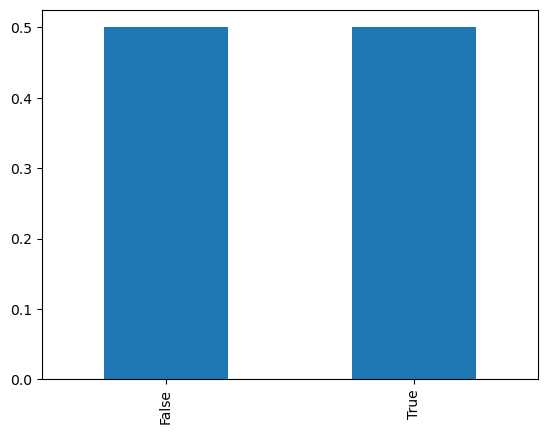

In [14]:
y_train_over.value_counts(normalize=True).plot(kind='bar')

# Hyperparameter tuning 

Building model

In [15]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_over, y_train_over)


GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [16]:

param_grid = {
 'n_estimators': [150,100],
 'learning_rate': [ 0.3,0.6 ],
 'max_depth': [2 , 3 ,5 ]
}

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring="recall", n_jobs=-1)
grid_search.fit(X_train_over, y_train_over)

print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150}
Best score: 1.00


# Feature importance

In [17]:
# Define the pipeline
pipe = make_pipeline(SimpleImputer(strategy='mean'),
                         GradientBoostingClassifier(
                            n_estimators=75,
                            random_state=42)
                         )
pipe.fit(X_train,Y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(n_estimators=75, random_state=42))])

In [18]:
y_pred = pipe.predict(X_train)

In [19]:
acc_train = pipe.score(X_train,Y_train)
acc_test = pipe.score(X_test,Y_test)

print("Training Accuracy:",round(acc_train,4))
print("Testing Accuracy:",round(acc_test,4))

Training Accuracy: 0.9742
Testing Accuracy: 0.9709


In [20]:
y_pred_test = pipe.predict(X_test)


In [21]:
accuracy = accuracy_score(Y_test, y_pred_test)
precision = precision_score(Y_test, y_pred_test)
recall = recall_score(Y_test, y_pred_test)
f1 = f1_score(Y_test, y_pred_test)

In [22]:
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1-Score: {:.3f}'.format(f1))

Accuracy: 0.971
Precision: 0.844
Recall: 0.338
F1-Score: 0.482


In [23]:
with open('model-1.pkl','wb') as f: 
  pickle.dump(grid_search,f)

Text(0.5, 1.0, 'Feature Importance')

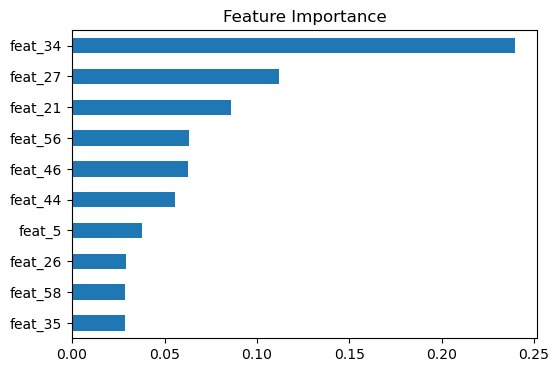

In [24]:
# Get feature names
features = X_train_over.columns

# Extract importance from the model
coefficients = pipe.named_steps['gradientboostingclassifier'].feature_importances_

# Create a series of feature importance
feature_imp = pd.Series(coefficients, index=features).sort_values(ascending=True)

# Plot feature importance (top 10 features) on a horizontal bar chart
feature_imp.tail(10).plot(kind='barh', figsize=(6,4))
# plt.xlabel('Gini Importance')
# plt.ylabel('Feature')
plt.title('Feature Importance')

# Reporting